# ABC

# ПРОГНОЗИРОВАНИЕ

# №1

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfe42uphp
  JVM stdout: /tmp/tmpfe42uphp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfe42uphp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_0c726b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV6.csv'
df = h2o.import_file(file)
df = df.drop('C1')
df = df.drop('Revenue_cat')
df = df.drop('Units')
df = df.drop('xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Manufacturer,Segment,MonthNo,District,abc_class
Natura,Convenience,12,District #02,B
Pirum,Productivity,12,District #38,B
VanArsdel,Moderation,12,District #10,A
Currus,Select,12,District #38,A
Abbas,Moderation,12,District #36,B
Natura,Youth,12,District #06,B
Natura,Youth,12,District #13,B
Quibus,Select,12,District #18,B
VanArsdel,Moderation,12,District #05,A
Currus,All Season,12,District #03,B


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Manufacturer,Segment,MonthNo,District,abc_class
Natura,Convenience,12,District #02,B
Pirum,Productivity,12,District #38,B
VanArsdel,Moderation,12,District #10,A
Currus,Select,12,District #38,A
Natura,Youth,12,District #13,B
Quibus,Select,12,District #18,B
VanArsdel,Moderation,12,District #05,A
Currus,All Season,12,District #03,B
Natura,Moderation,12,District #10,A
Natura,Convenience,12,District #31,A


In [5]:
valid

Manufacturer,Segment,MonthNo,District,abc_class
VanArsdel,Convenience,12,District #24,A
Aliqui,Extreme,12,District #31,A
Aliqui,Extreme,12,District #21,A
Aliqui,Extreme,12,District #34,A
Aliqui,Extreme,12,District #36,A
VanArsdel,Moderation,12,District #28,A
VanArsdel,Moderation,12,District #23,A
VanArsdel,Moderation,12,District #09,A
Currus,Extreme,12,District #39,A
VanArsdel,Moderation,12,District #38,A


In [6]:
unseen

Manufacturer,Segment,MonthNo,District,abc_class
Abbas,Moderation,12,District #36,B
Natura,Youth,12,District #06,B
Natura,Moderation,12,District #12,A
VanArsdel,Moderation,12,District #22,A
VanArsdel,Moderation,12,District #30,A
Currus,Extreme,12,District #13,A
Currus,Extreme,12,District #38,A
VanArsdel,Moderation,12,District #03,A
VanArsdel,Moderation,12,District #01,A
Currus,Extreme,12,District #09,A


In [7]:
y = "abc_class"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
13:39:14.184: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_1_20230927_133914


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         1.04018e+07            20           20           20            2001          7083          4437.82

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.27221786783847635
RMSE: 0.5217450218626685
LogLoss: 0.7739741902165915
Mean Per-Class Error: 0.4323898960751844
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A       B      C      Error     Rate
------  -----  -----  --------  ----------------
108775  15001  1354   0.130704  16,355 / 125,130
33570   33561  9622   0.56274   43,192 / 76,753
8309    11786  13190  0.603725  20,095 / 33,285
150654  60348  24166  0.33866   79,642 / 235,168

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.66134
2    0.919117
3    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.2703375522425971
RMSE: 0.5199399506121809
LogLoss: 0.7674896264671057
Mean Per-Class Error: 0.4270433937713109
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A      B      C     Error     Rate
-----  -----  ----  --------  ---------------
23402  3205   260   0.128969  3,465 / 26,867
7076   7056   1916  0.560319  8,992 / 16,048
1735   2444   2882  0.591843  4,179 / 7,061
32213  12705  5058  0.33288   16,636 / 49,976

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.66712
2    0.923663
3    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.27255597512515123
RMSE: 0.5220689371387185
LogLoss: 0.7726693400878786
Mean Per-Class Error: 0.43212613094533725
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A       B      C      Error     Rate
------  -----  -----  --------  ----------------
108928  15073  1129   0.129481  16,202 / 125,130
33635   33883  9235   0.558545  42,870 / 76,753
8361    11888  13036  0.608352  20,249 / 33,285
150924  60844  23400  0.337295  79,321 / 235,168

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.662705
2    0.921329
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.662705  0.00196077  0.662542      0.664881      0.664307      0.660026      0.661769
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.337295  0.00196077  0.33745

In [9]:
lb = aml.leaderboard
lb

model_id,mean_per_class_error,logloss,rmse,mse
XRT_1_AutoML_1_20230927_133914,0.432126,0.772669,0.522069,0.272556
StackedEnsemble_AllModels_1_AutoML_1_20230927_133914,0.438077,0.746777,0.508688,0.258764
StackedEnsemble_BestOfFamily_1_AutoML_1_20230927_133914,0.438213,0.747309,0.508874,0.258953
XGBoost_3_AutoML_1_20230927_133914,0.441599,0.749687,0.510246,0.260351
GBM_2_AutoML_1_20230927_133914,0.442958,0.753313,0.511814,0.261954
GBM_3_AutoML_1_20230927_133914,0.44337,0.753313,0.511572,0.261706
XGBoost_2_AutoML_1_20230927_133914,0.444086,0.753669,0.511108,0.261231
XGBoost_1_AutoML_1_20230927_133914,0.446077,0.758971,0.512558,0.262716
GBM_4_AutoML_1_20230927_133914,0.446556,0.756844,0.512888,0.263054
GBM_1_AutoML_1_20230927_133914,0.447964,0.761156,0.514765,0.264983


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['XRT_1_AutoML_1_20230927_133914',
 'StackedEnsemble_AllModels_1_AutoML_1_20230927_133914',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230927_133914',
 'XGBoost_3_AutoML_1_20230927_133914',
 'GBM_2_AutoML_1_20230927_133914',
 'GBM_3_AutoML_1_20230927_133914',
 'XGBoost_2_AutoML_1_20230927_133914',
 'XGBoost_1_AutoML_1_20230927_133914',
 'GBM_4_AutoML_1_20230927_133914',
 'GBM_1_AutoML_1_20230927_133914',
 'GLM_1_AutoML_1_20230927_133914',
 'DRF_1_AutoML_1_20230927_133914']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'std_coefs_class_A': {'Intercept': -0.9016645132888844,
  'XRT_1_AutoML_1_20230927_133914/A': -0.3346650648358799,
  'XRT_1_AutoML_1_20230927_133914/B': -0.08410018207940288,
  'XRT_1_AutoML_1_20230927_133914/C': -0.03705562492472871,
  'XGBoost_3_AutoML_1_20230927_133914/A': 1.010784120672469,
  'XGBoost_3_AutoML_1_20230927_133914/B': 0.0,
  'XGBoost_3_AutoML_1_20230927_133914/C': 0.015177957251416803,
  'GBM_2_AutoML_1_20230927_133914/A': 0.2087270740799585,
  'GBM_2_AutoML_1_20230927_133914/B': 0.0,
  'GBM_2_AutoML_1_20230927_133914/C': 0.0,
  'GBM_3_AutoML_1_20230927_133914/A': 0.6171827384871845,
  'GBM_3_AutoML_1_20230927_133914/B': -0.04903627574606938,
  'GBM_3_AutoML_1_20230927_133914/C': 0.0,
  'XGBoost_2_AutoML_1_20230927_133914/A': 0.38228589219449255,
  'XGBoost_2_AutoML_1_20230927_133914/B': 0.06132949350587764,
  'XGBoost_2_AutoML_1_20230927_133914/C': -1.1690961107919822e-06,
  'XGBoost_1_AutoML_1_20230927_133914/A': 0.13235713979229763,
  'XGBoost_1_AutoML_1_20230927_

In [14]:
%matplotlib inline
#metalearner.std_coef_plot()

TypeError: bad operand type for abs(): 'dict'

# Что с важностью признаков

Model ID: XRT_1_AutoML_1_20230927_133914


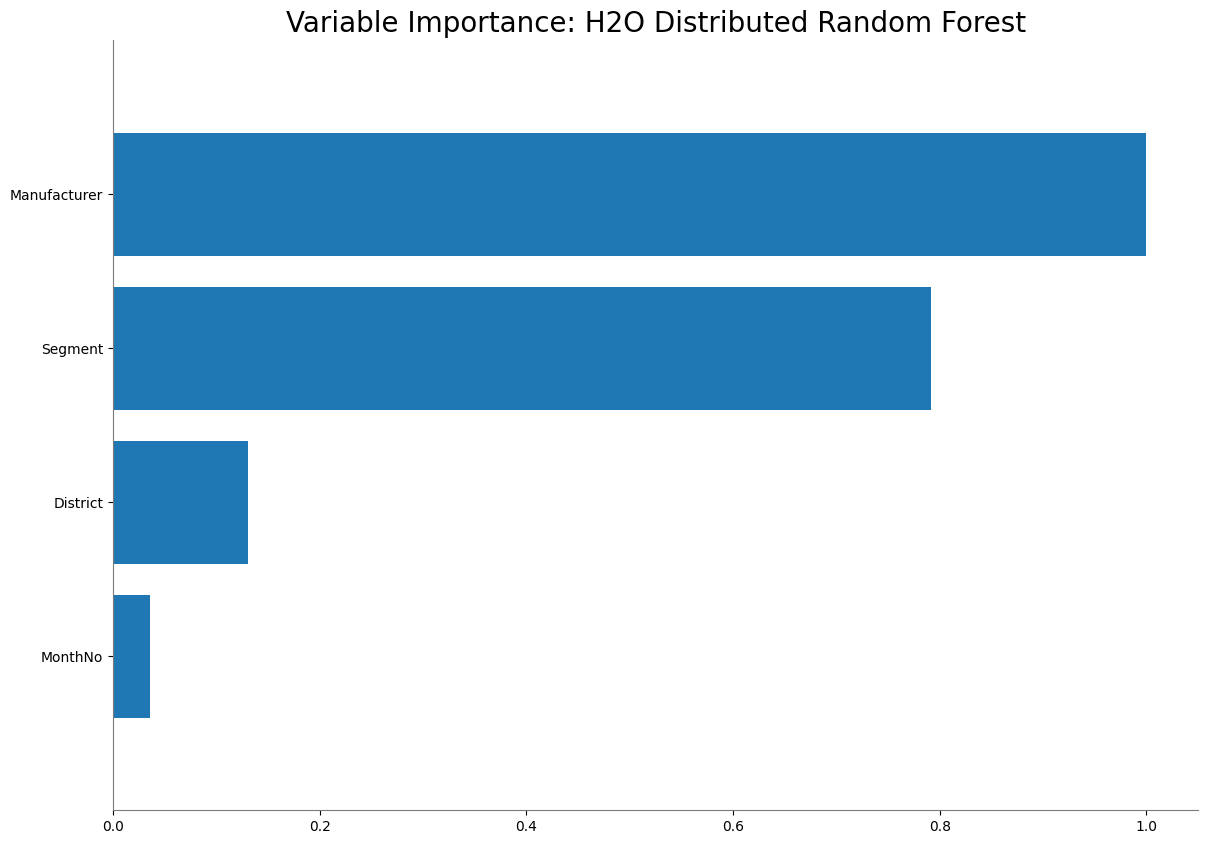

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230927_133914
StackedEnsemble_AllModels_1_AutoML_1_20230927_133914 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230927_133914
StackedEnsemble_BestOfFamily_1_AutoML_1_20230927_133914 - ERROR PLOTTING
Model ID: XGBoost_3_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

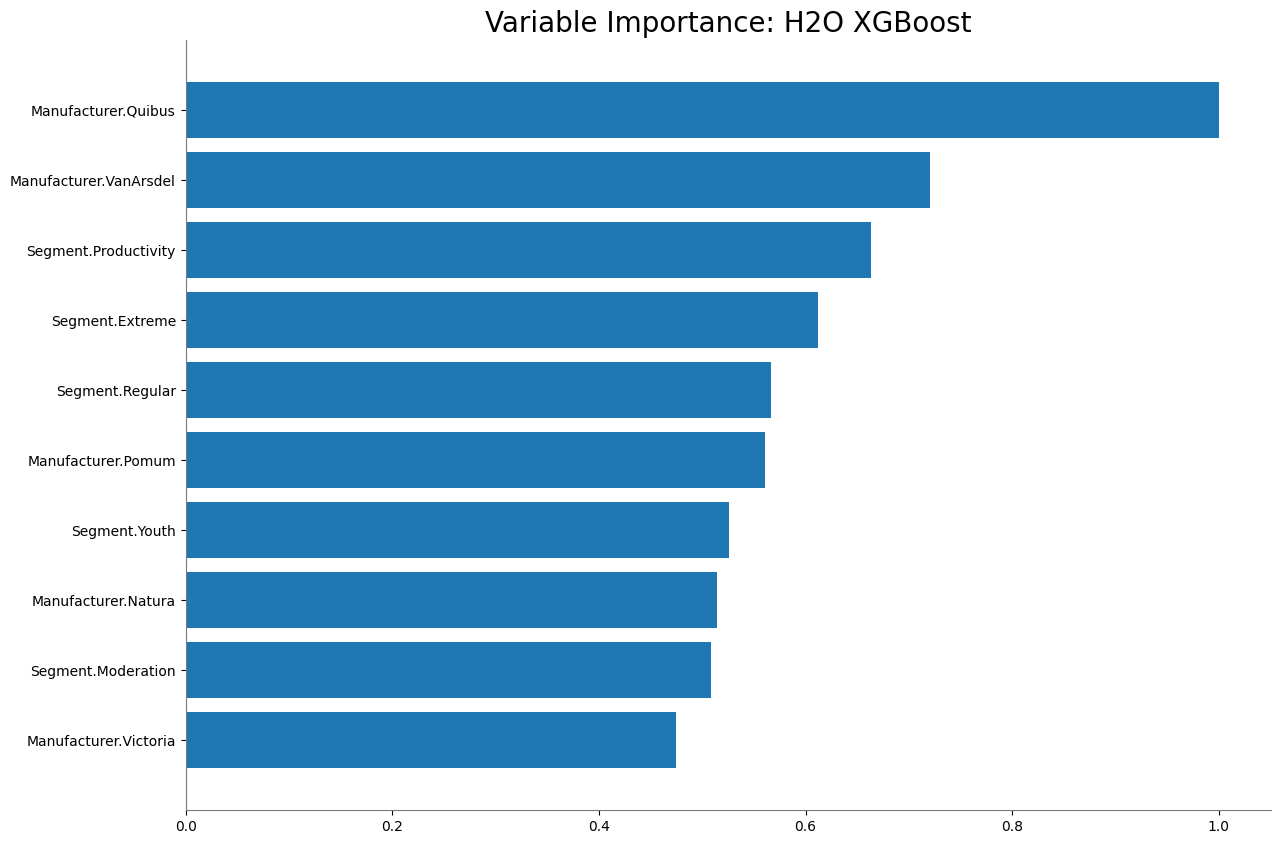

Model ID: GBM_2_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

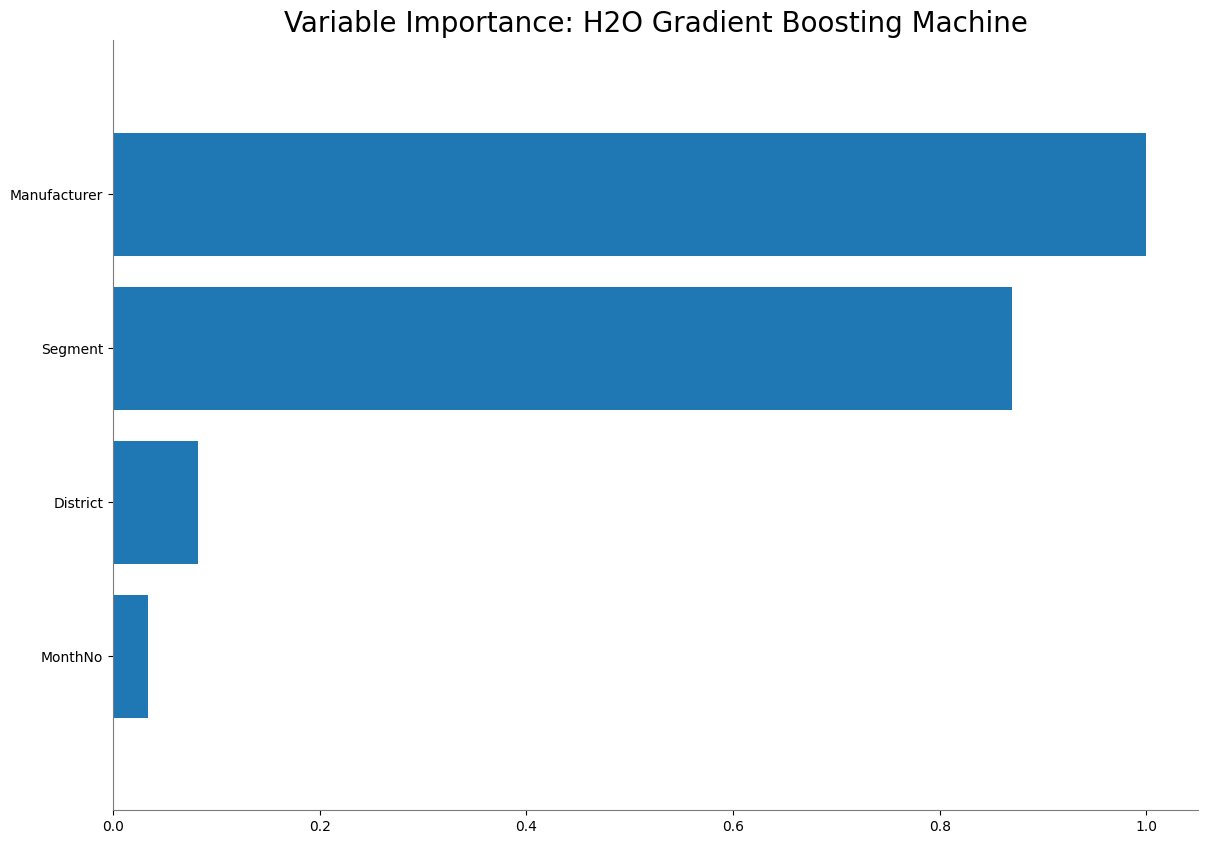

Model ID: GBM_3_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

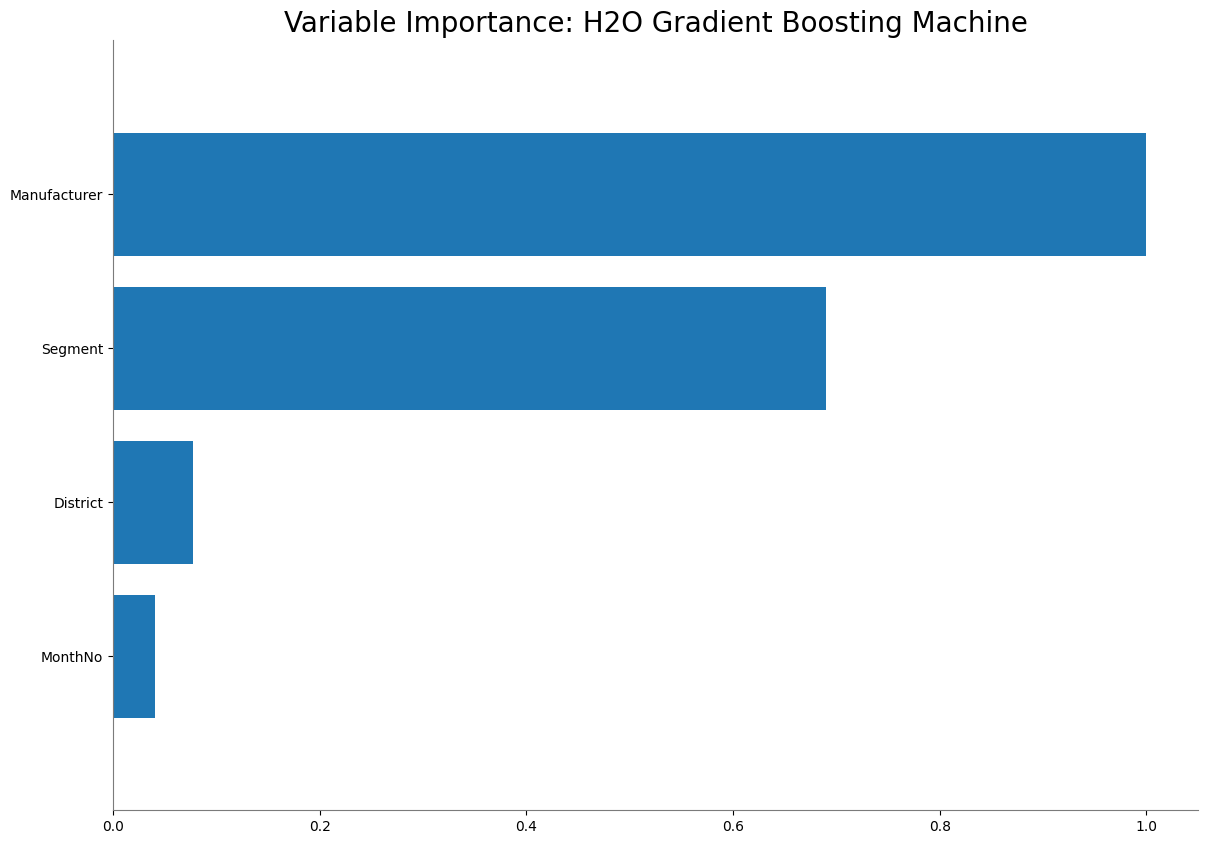

Model ID: XGBoost_2_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

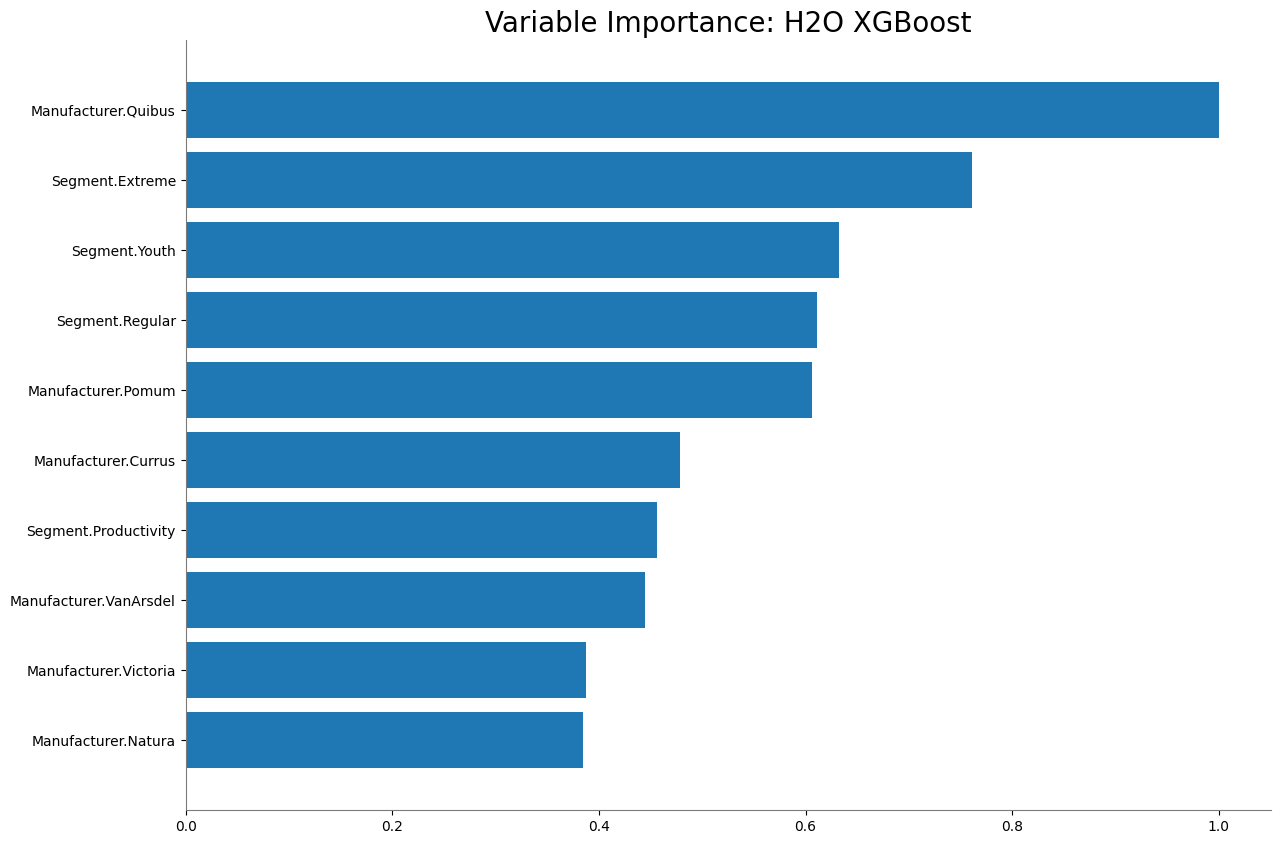

Model ID: XGBoost_1_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

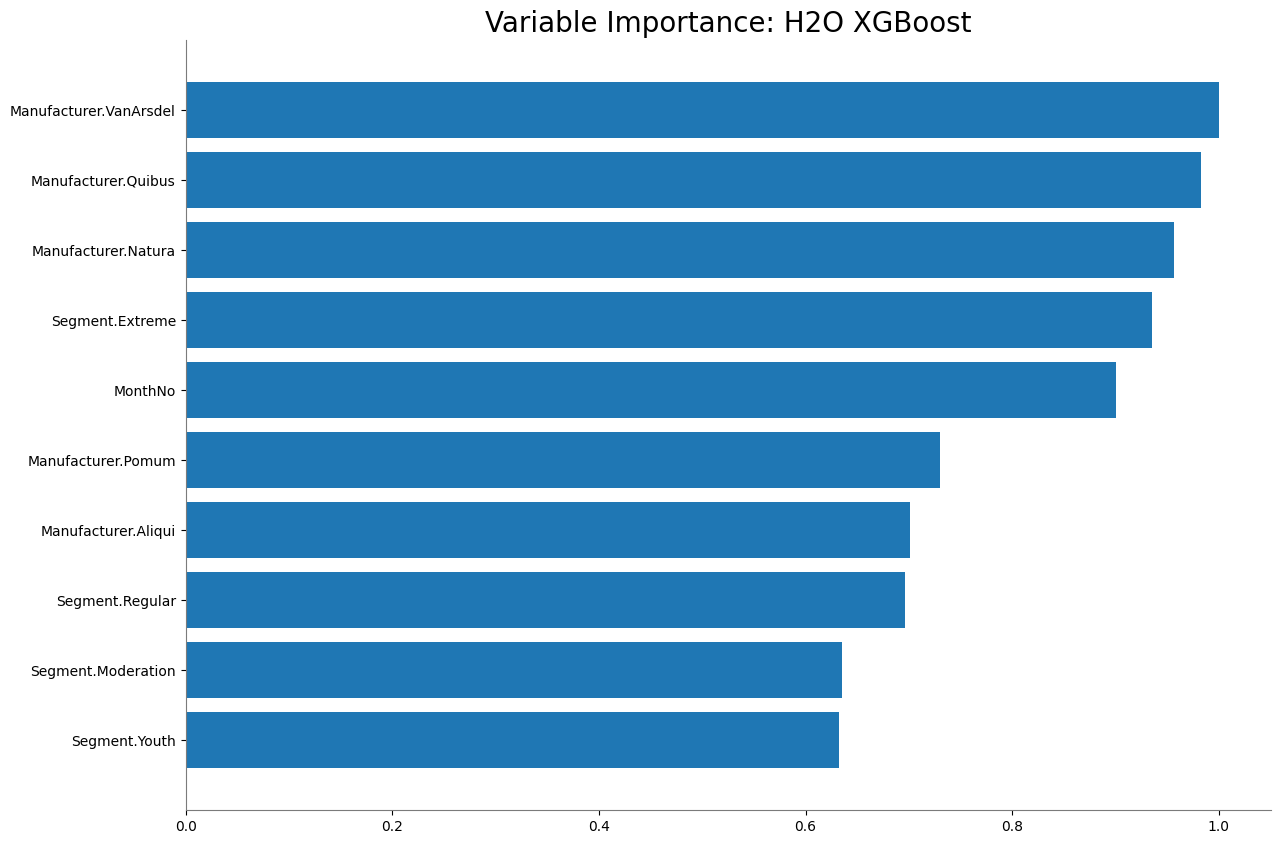

Model ID: GBM_4_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

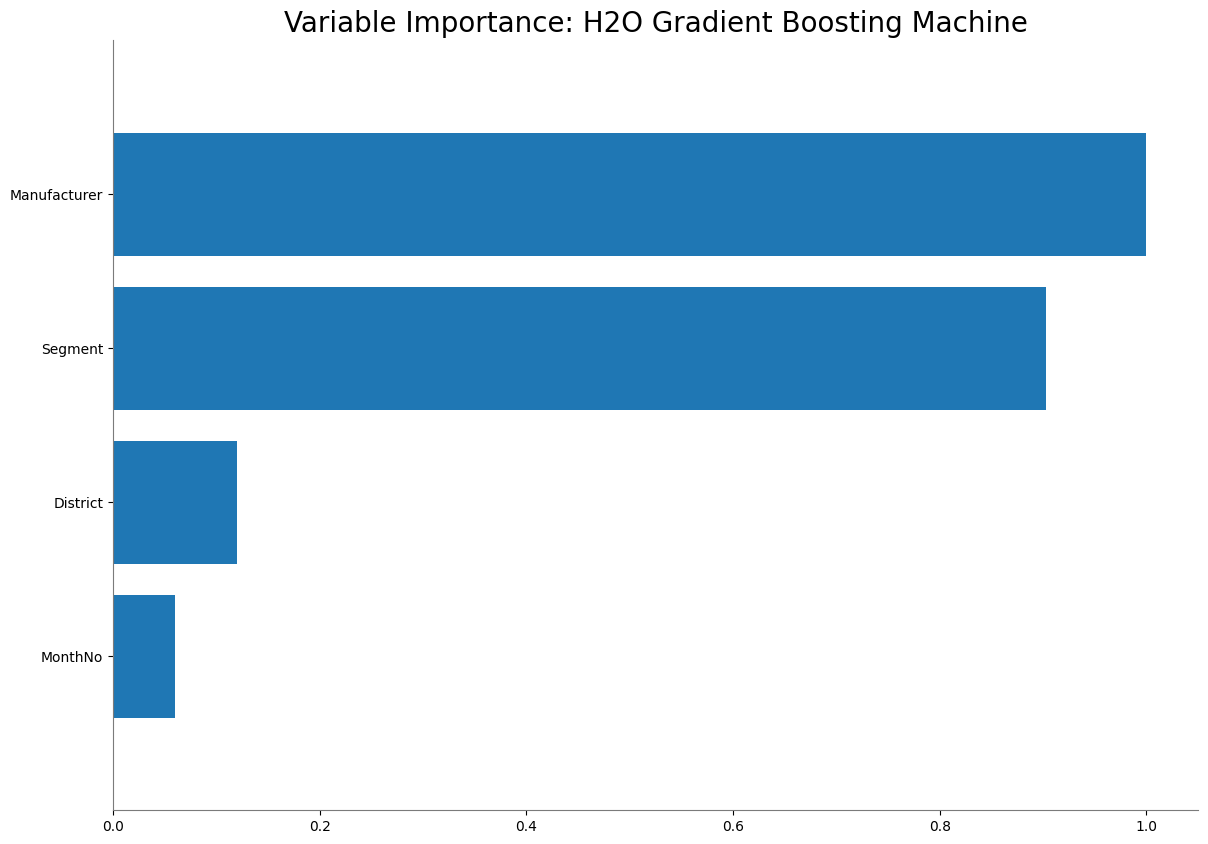

Model ID: GBM_1_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

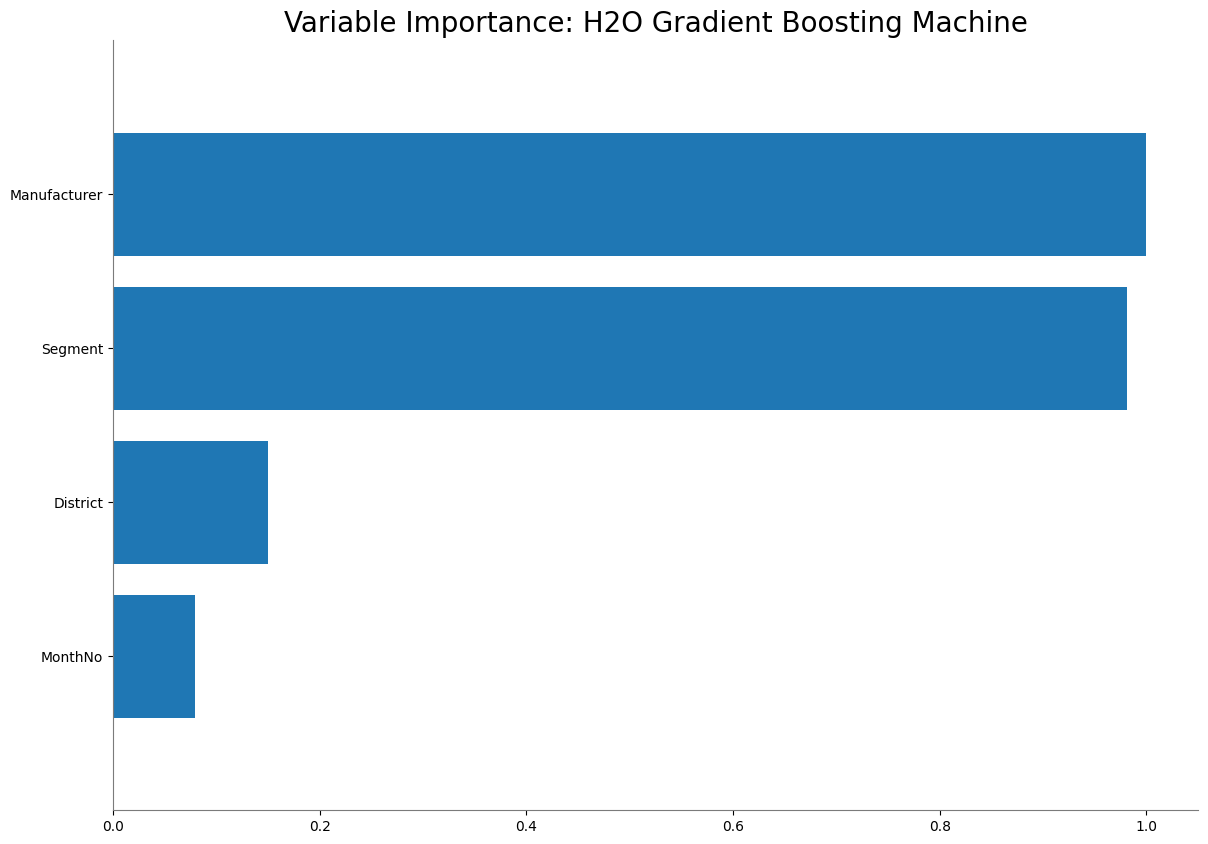

Model ID: GLM_1_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

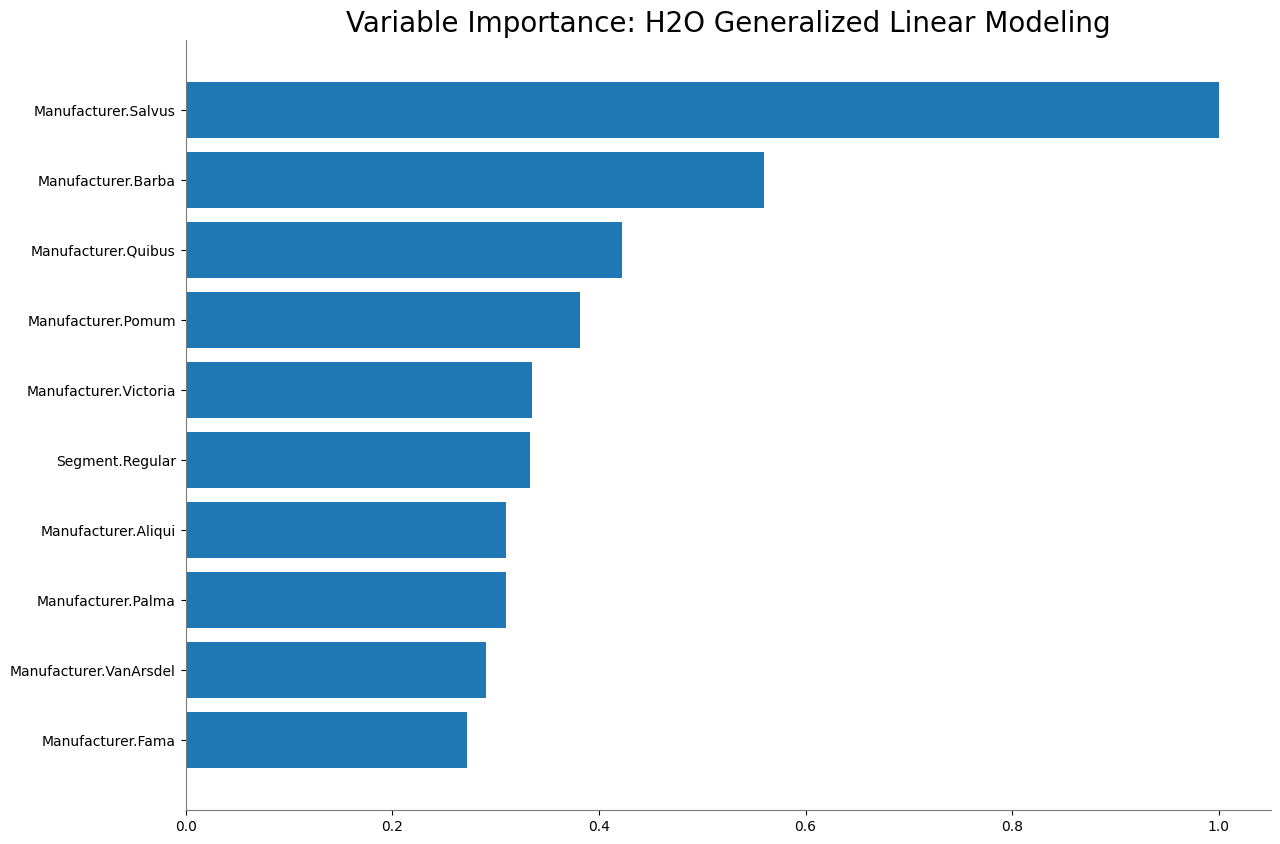

Model ID: DRF_1_AutoML_1_20230927_133914


<Figure size 640x480 with 0 Axes>

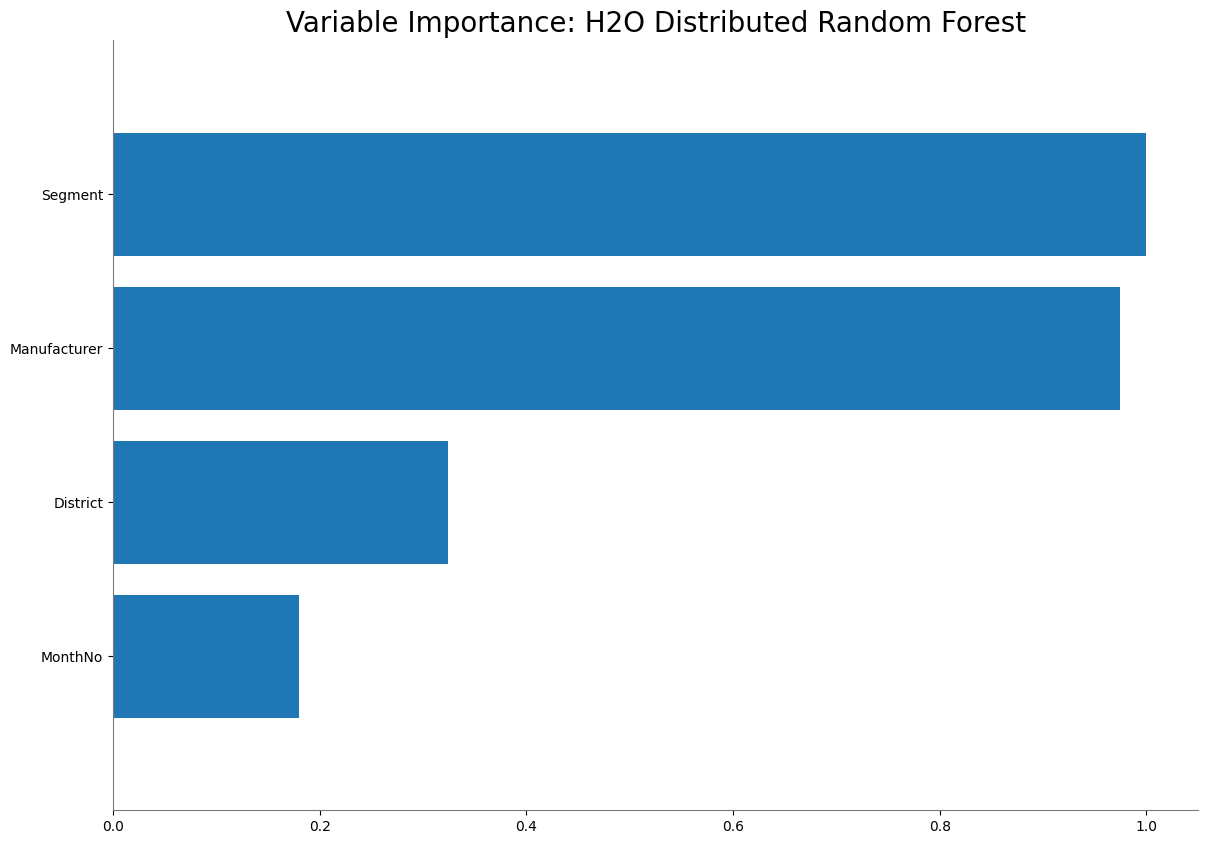

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Units'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: XRT_1_AutoML_1_20230927_133914
ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.2703375522425971
RMSE: 0.5199399506121809
LogLoss: 0.7674896264671057
Mean Per-Class Error: 0.4270433937713109
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A      B      C     Error     Rate
-----  -----  ----  --------  ---------------
23402  3205   260   0.128969  3,465 / 26,867
7076   7056   1916  0.560319  8,992 / 16,048
1735   2444   2882  0.591843  4,179 / 7,061
32213  12705  5058  0.33288   16,636 / 49,976

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.66712
2    0.923663
3    1
R2 cross validation: 0.4776

# Графии кривых обучения

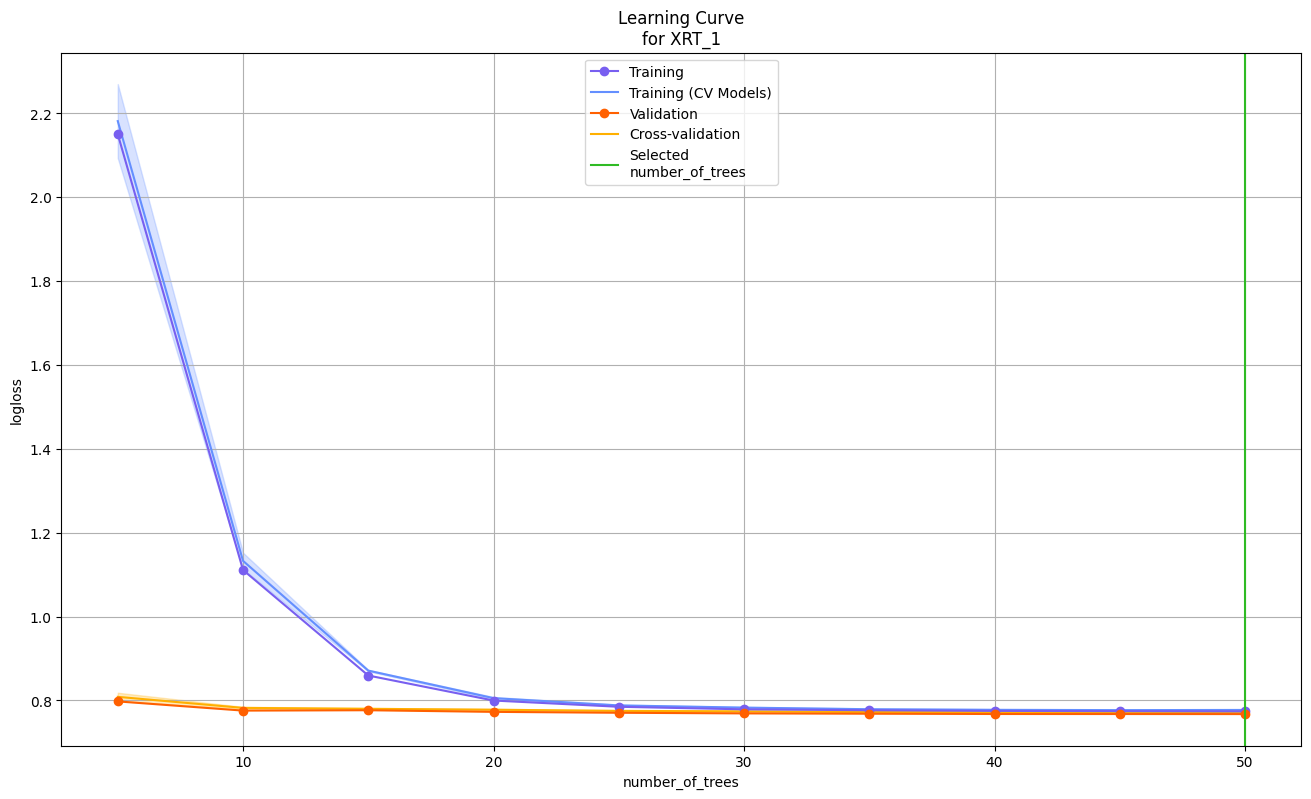

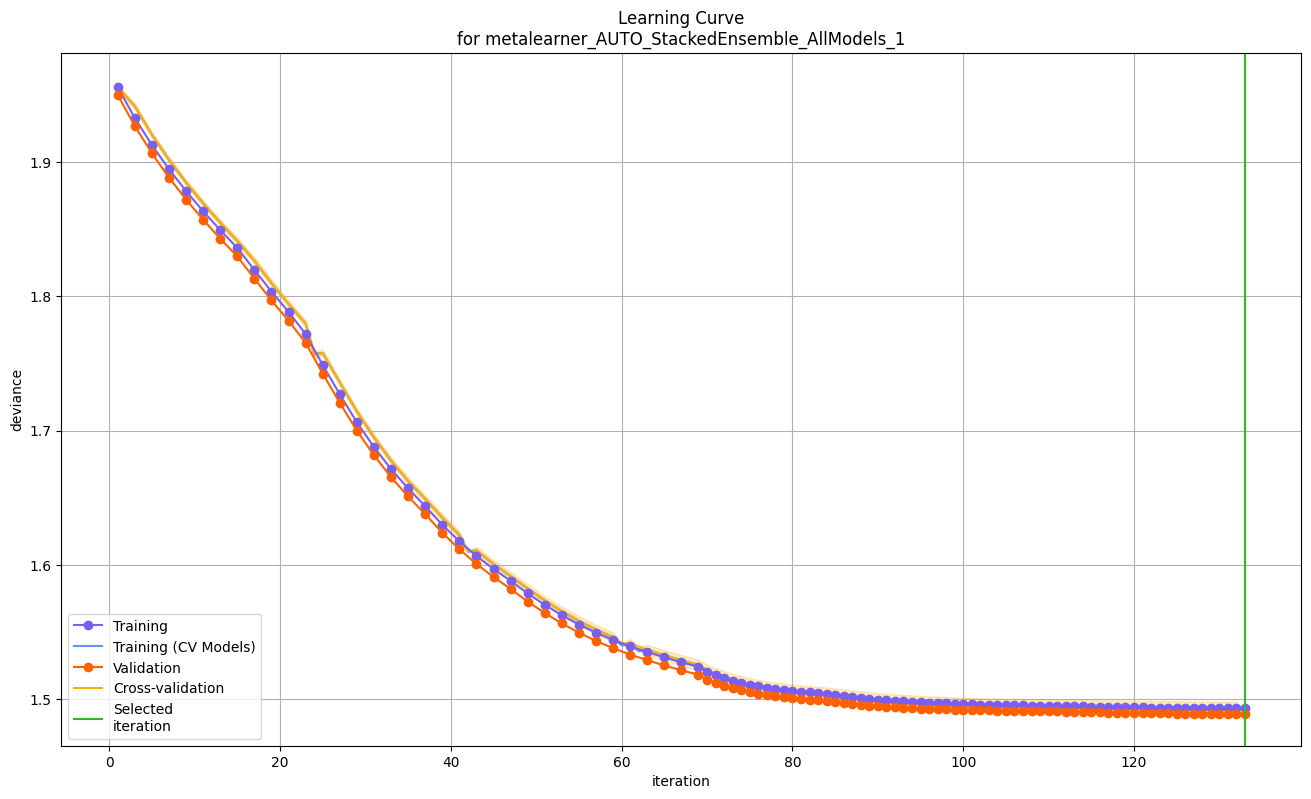

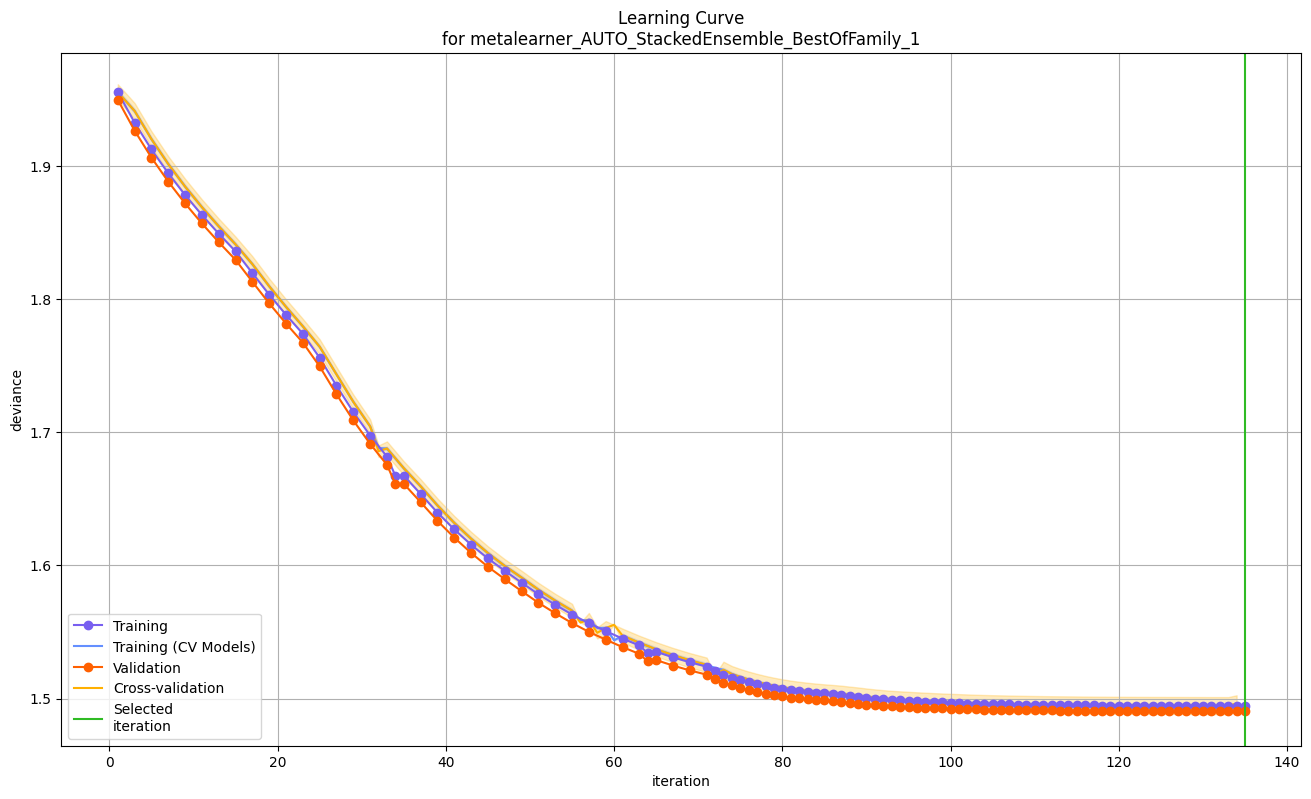

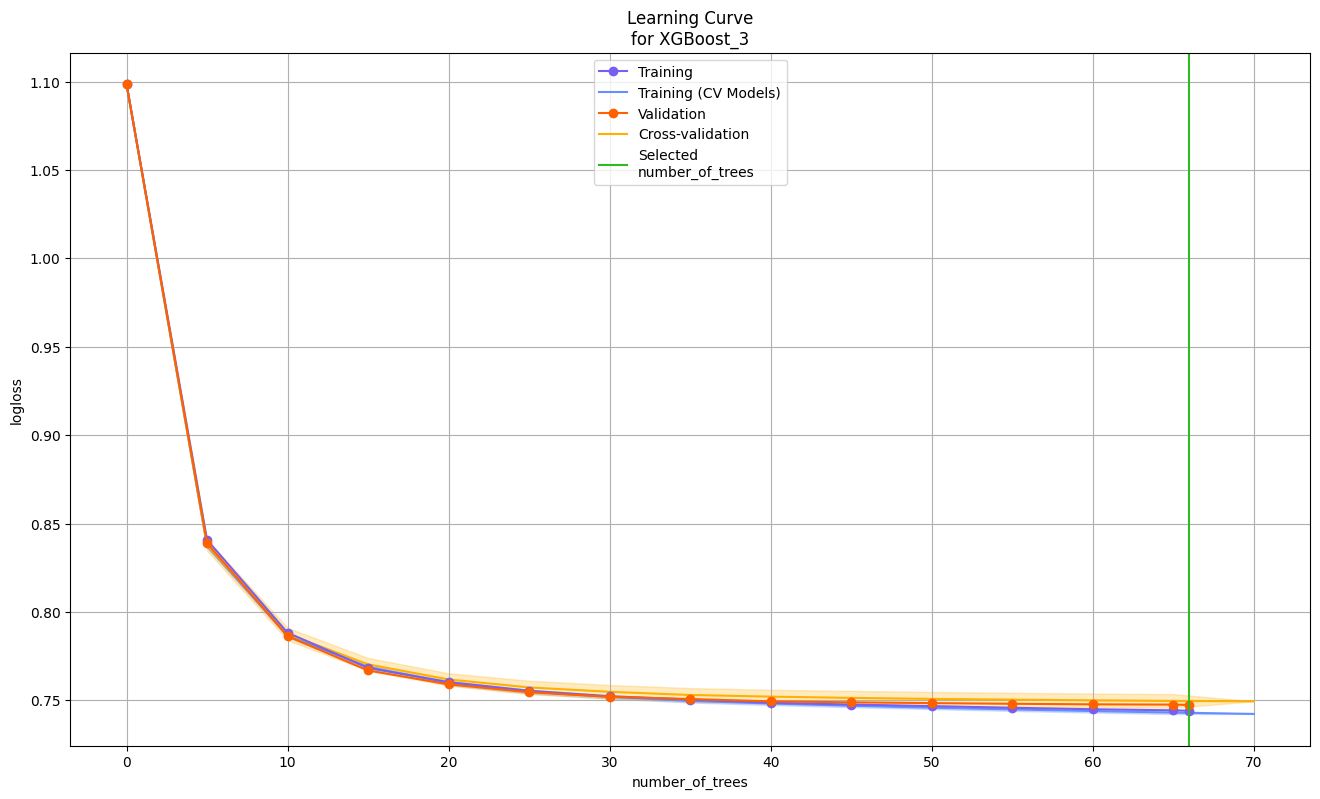

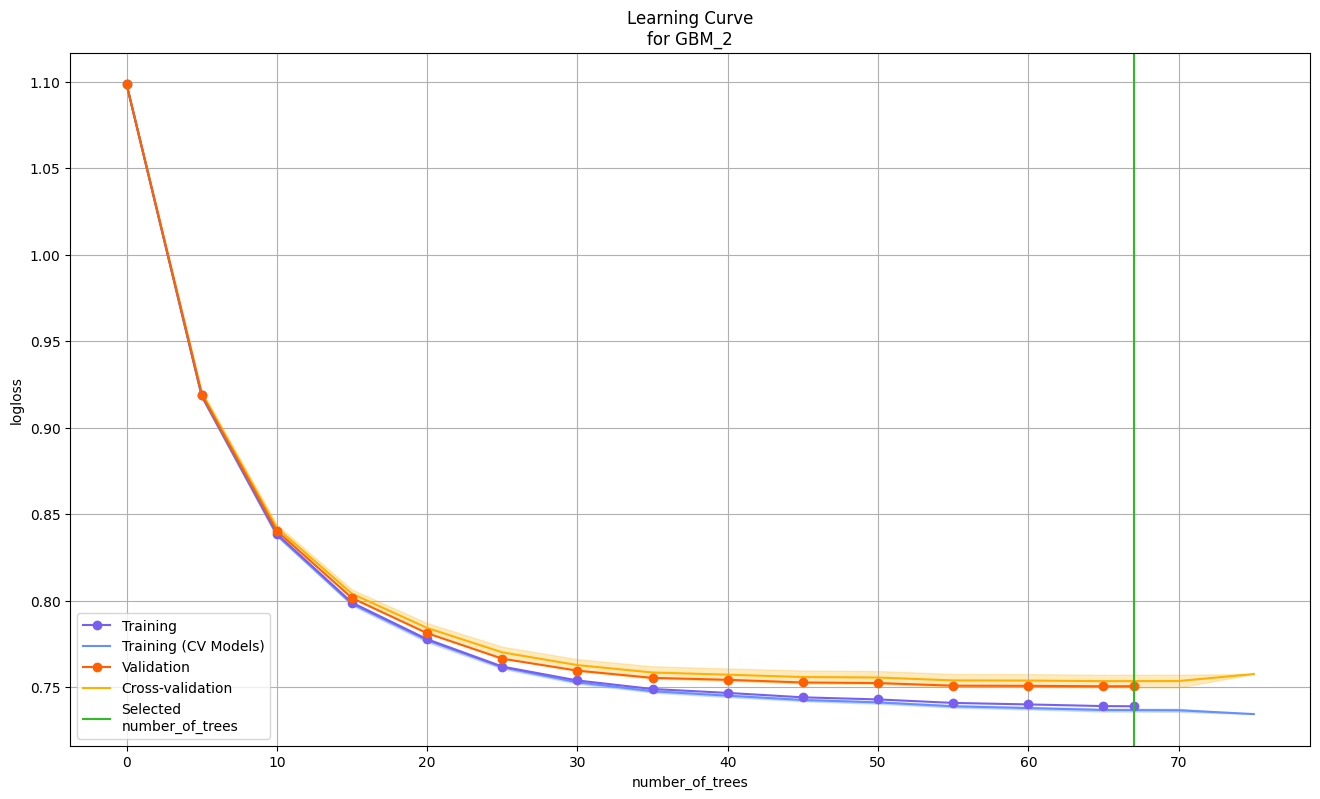

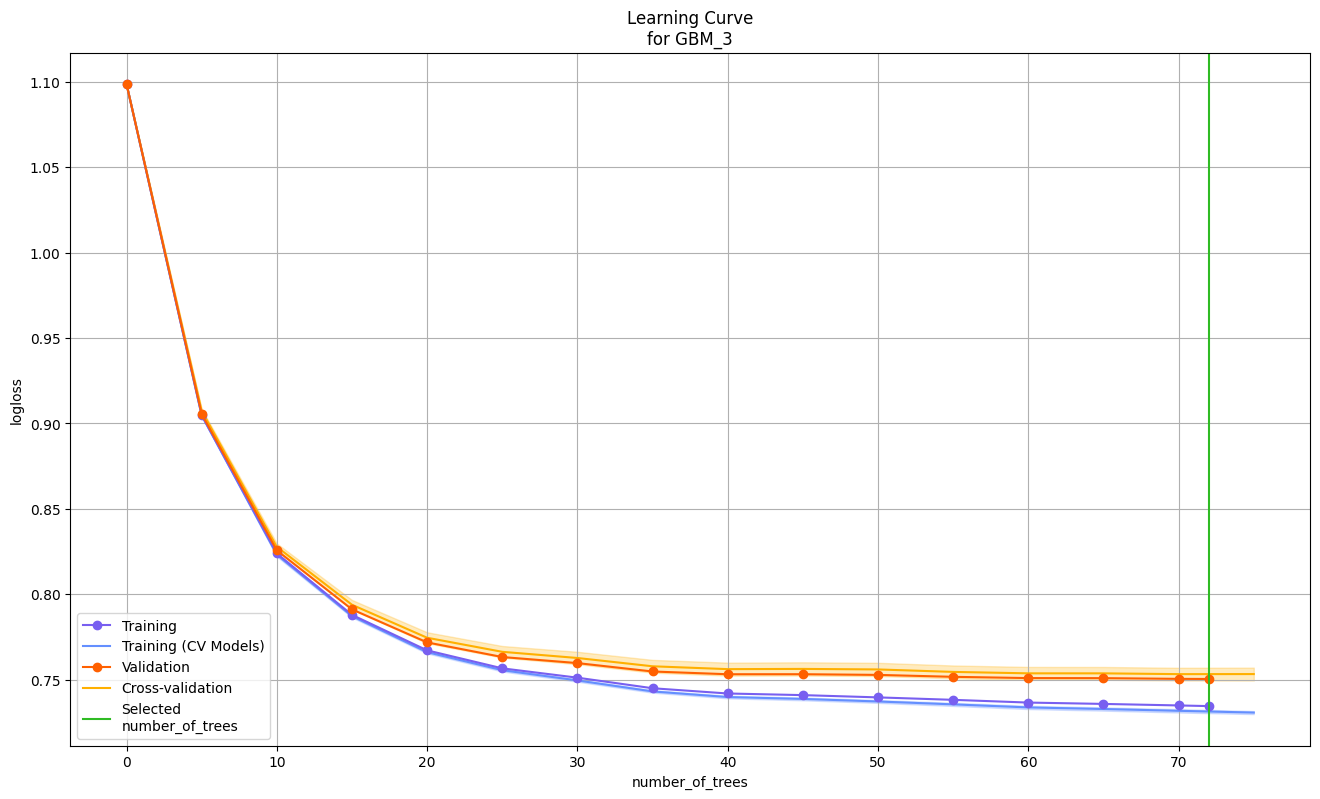

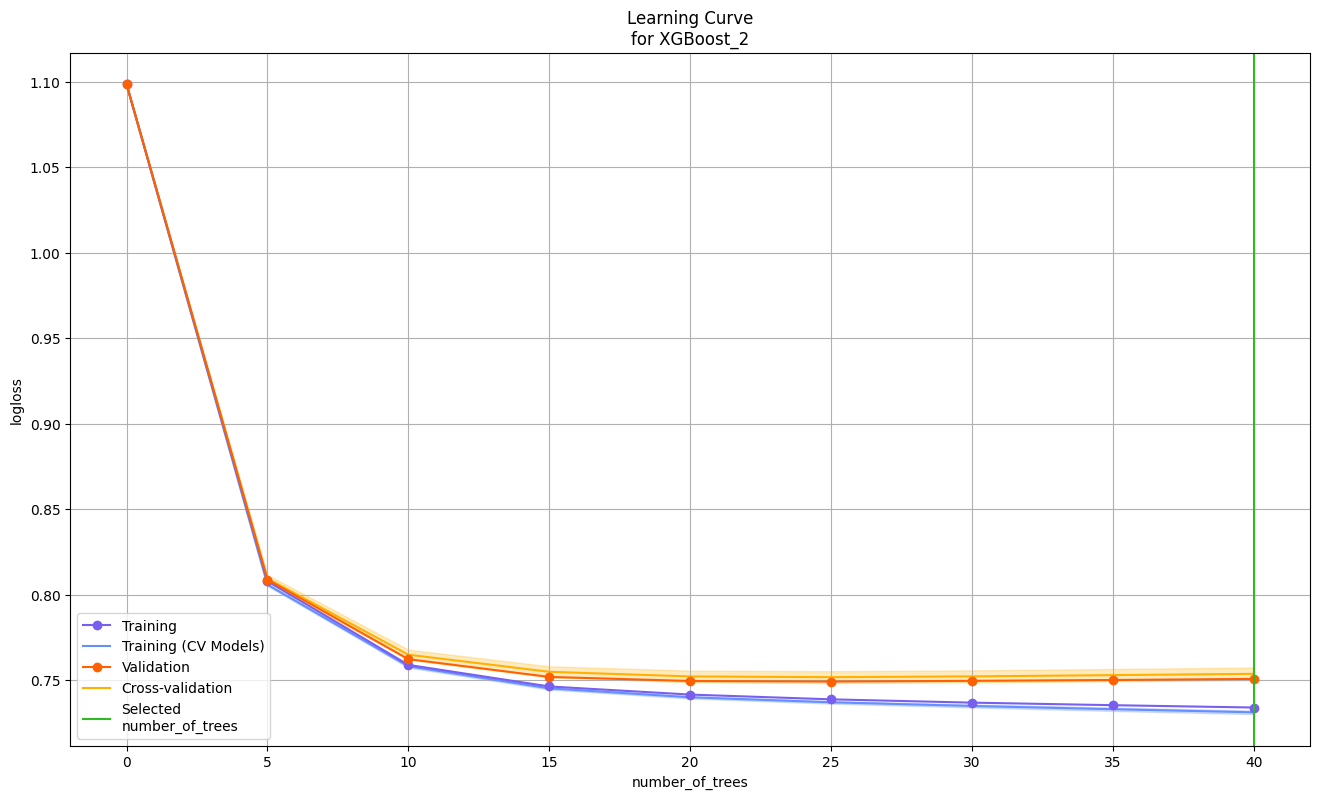

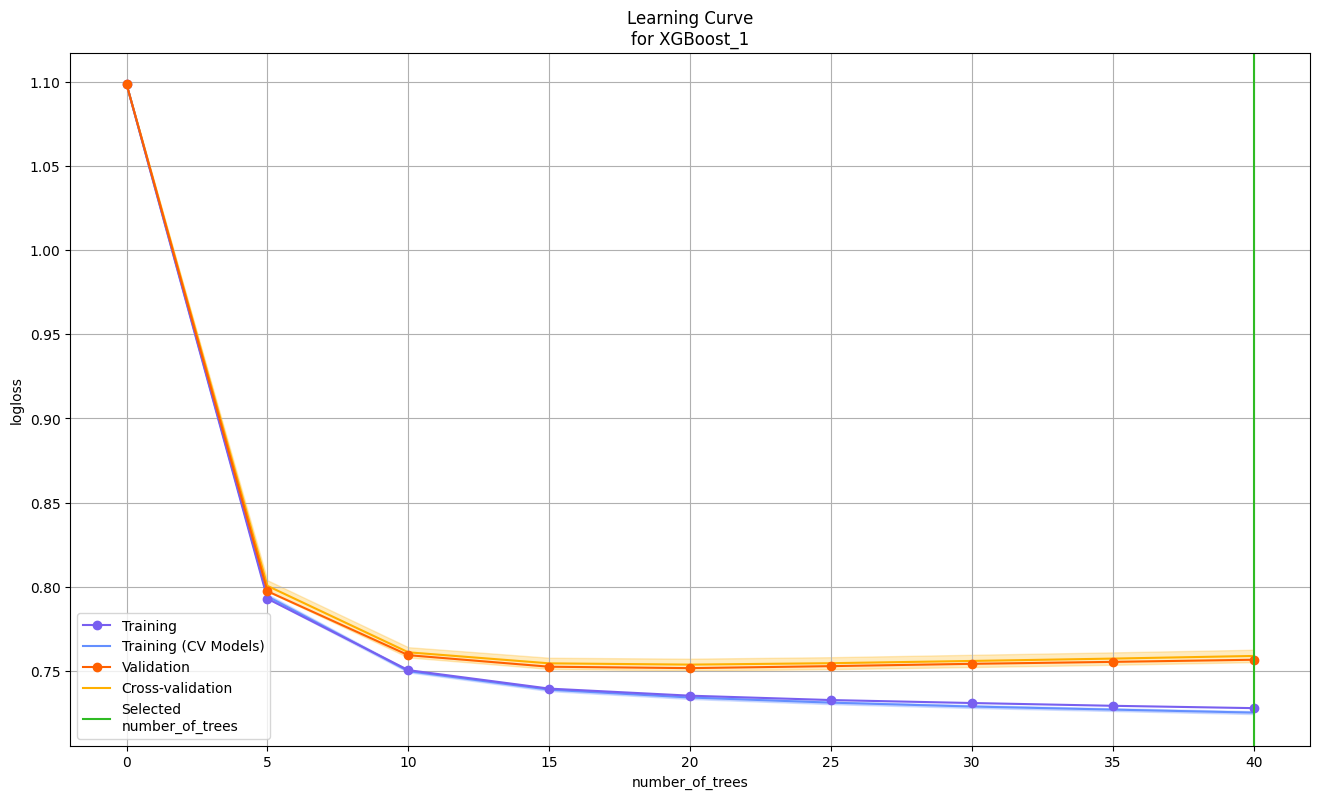

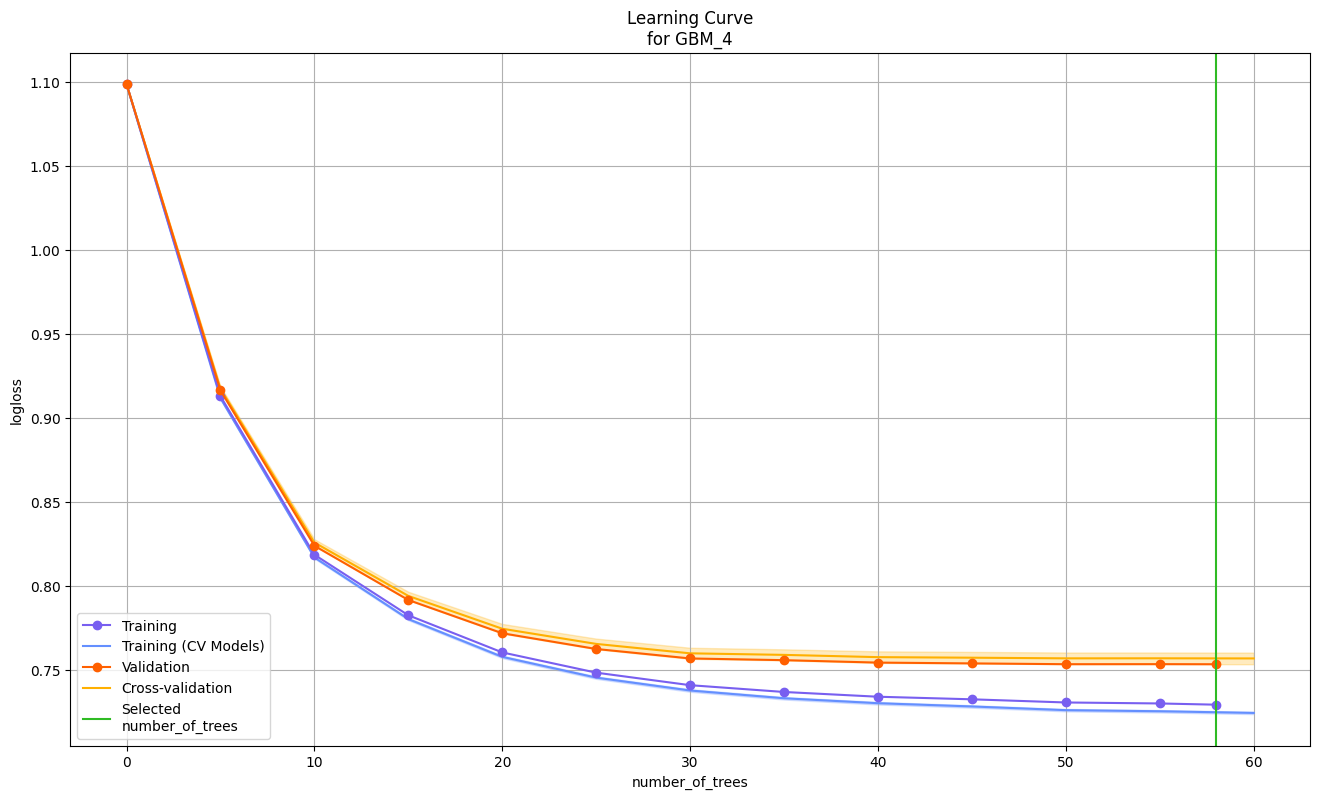

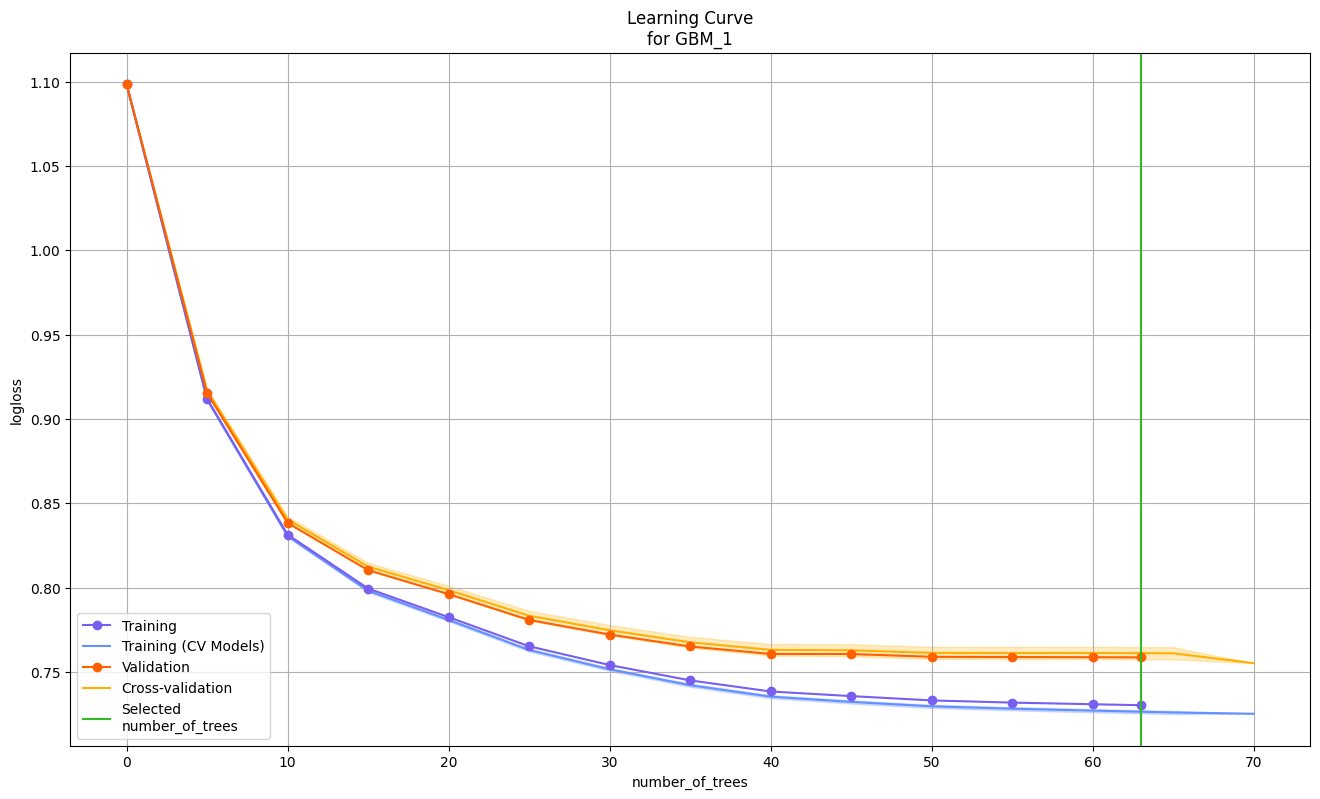

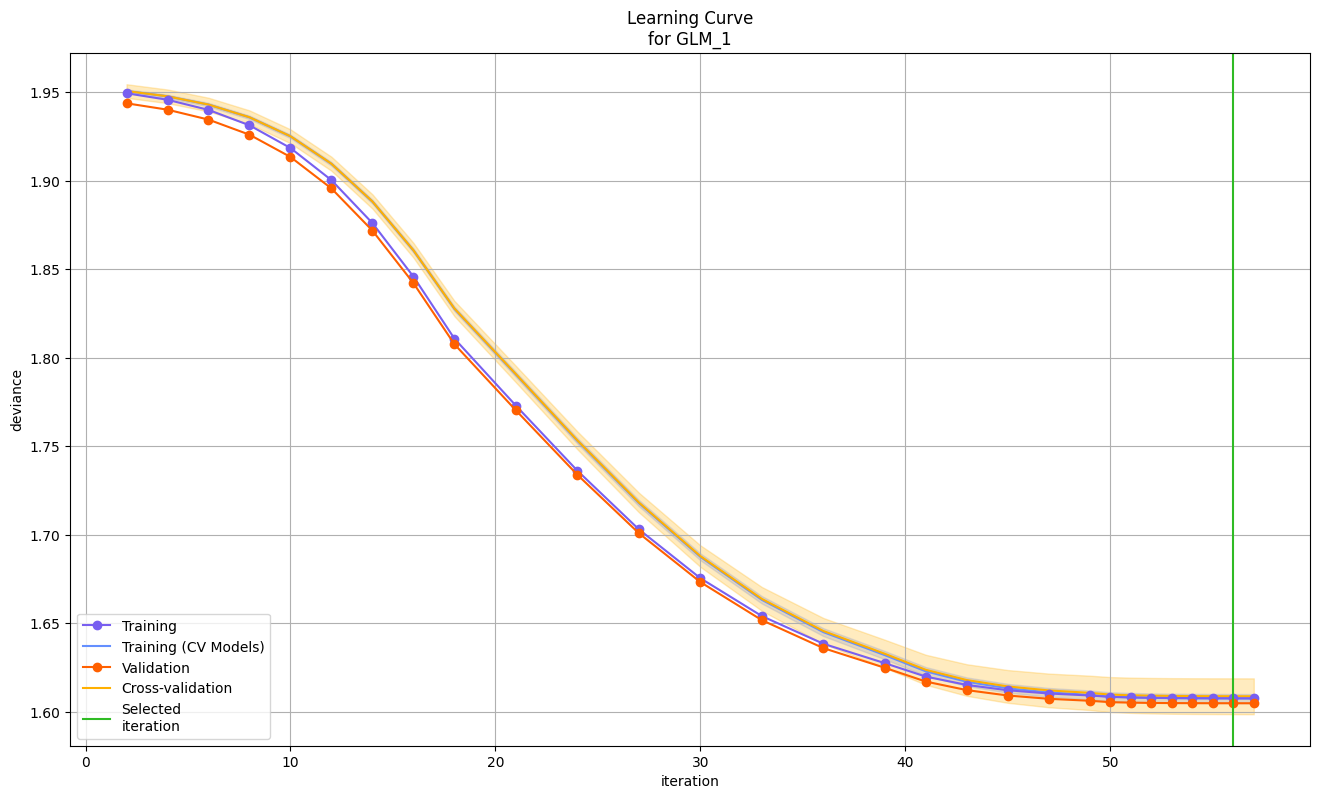

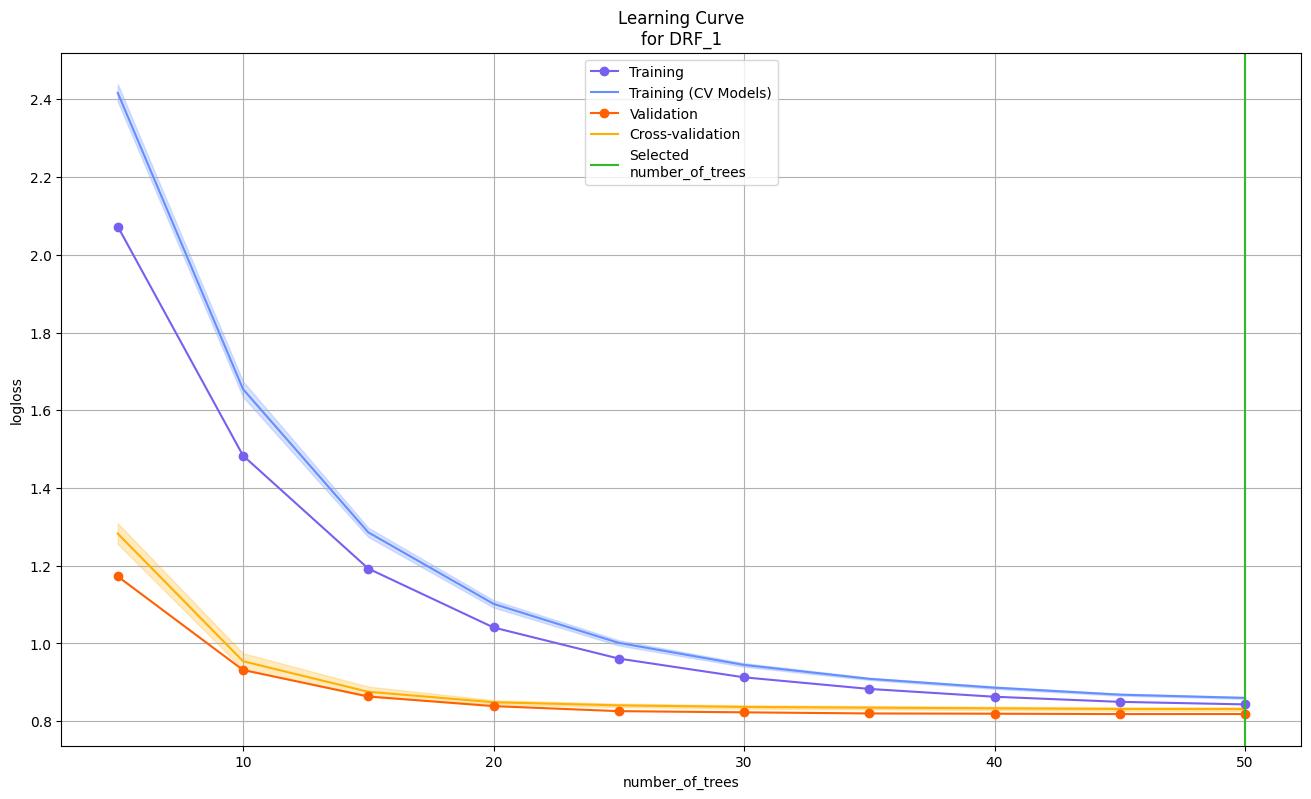

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [ ]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [ ]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")